<a href="https://colab.research.google.com/github/hannatang-beep/GR5074-Adv-Machine-Learning/blob/main/Group1_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Uni : Fill Here. (Also change Uni in the title of your notebook)
# Your Full name : Fill Here
# Link to your Public Github repository with Final report  : Fill here


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')
whr_df = pd.read_csv('/content/drive/MyDrive/GR5074 Adv Machine Learning/Project_1/data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


Mounted at /content/drive


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [ ]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

In [ ]:
# Your answer: y_train.astype('category')is the pre-process to convert the categorical happiness labels into numerical codes;
#.cat.codes - This accesses the numerical codes that pandas assigns to each unique category value.
# y_train_labels: Contains numerical equivalents, typically starting from 0: for this case: 'Very Low' → 0, 'Low' → 1, 'Average' → 2, 'High' → 3, 'Very High' → 4

In [ ]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("/content/drive/MyDrive/GR5074 Adv Machine Learning/Project_1/data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

# Merge the new country variables with X_train
X_train = X_train.merge(
    countrydata,
    left_on='country',
    right_on='country_name',
    how='left'
)

# Merge the new country variables with X_test
X_test = X_test.merge(
    countrydata,
    left_on='country',
    right_on='country_name',
    how='left'
)

In [ ]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,Madagascar,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [ ]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
## Your answer: This image shows the data types of each column in X_train DataFrame after merging with the country data.
# String columns: country, region, country_name
# Numerical features: gdp_per_capita, population, population_below_poverty_line, gni, hdi, life_expectancy, expected_years_of_schooling, mean_years_of_schooling, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption


Find out the number and percentage of missing values in the table per column

In [ ]:
missing_values = X_train.isnull().sum()

# Calculate percentage of missing values
total_rows = len(X_train)
missing_percentage = (missing_values / total_rows) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Sort by number of missing values (descending)
missing_summary = missing_summary.sort_values('Missing Values', ascending=False)

print(missing_summary)

                               Missing Values  Percentage (%)
population_below_poverty_line              16       16.842105
life_expectancy                             7        7.368421
expected_years_of_schooling                 7        7.368421
mean_years_of_schooling                     7        7.368421
gni                                         7        7.368421
country_name                                6        6.315789
population                                  6        6.315789
hdi                                         6        6.315789
country                                     0        0.000000
region                                      0        0.000000
gdp_per_capita                              0        0.000000
social_support                              0        0.000000
healthy_life_expectancy                     0        0.000000
freedom_to_make_life_choices                0        0.000000
generosity                                  0        0.000000
percepti

Plot the frequency distribution / histogram of some of the numerical features that you think are important

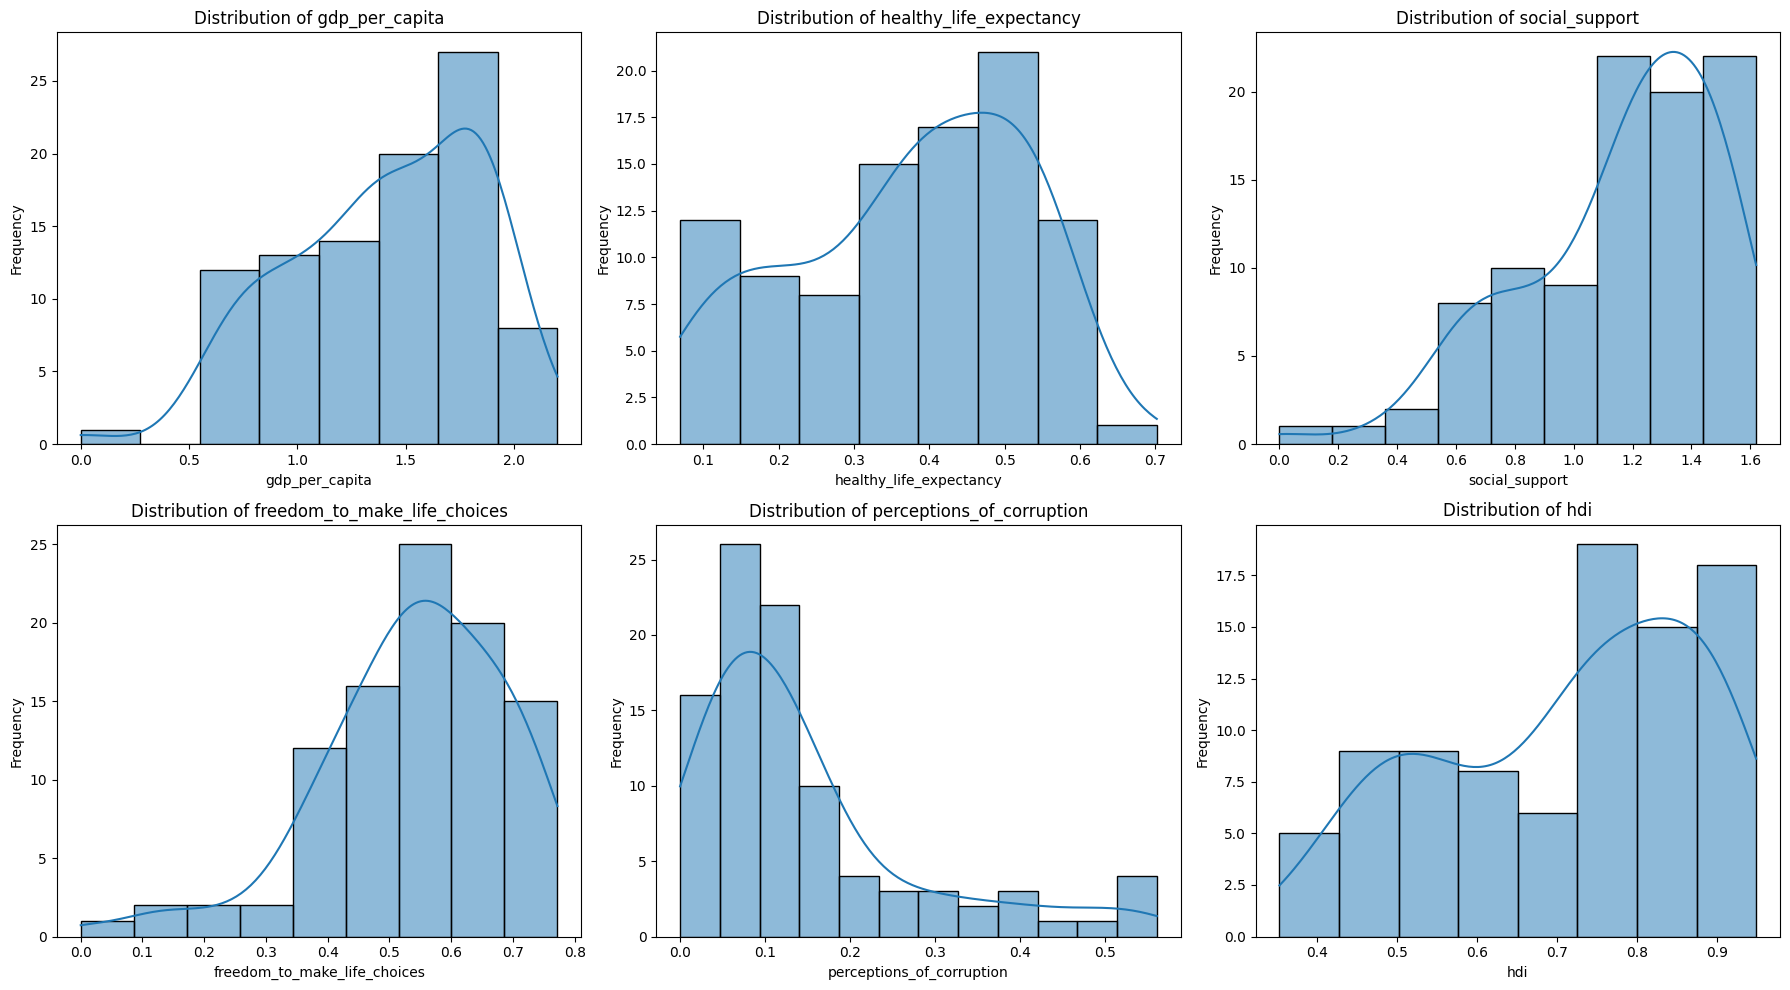

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# List of important numerical features to plot
important_features = ['gdp_per_capita', 'healthy_life_expectancy',
                      'social_support', 'freedom_to_make_life_choices',
                      'perceptions_of_corruption', 'hdi']

# Plot histograms for each feature
for i, feature in enumerate(important_features):
    if i < len(axes):
        sns.histplot(X_train[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

<ipython-input-12-0b6c5ca91542>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=happiness_counts.index, y=happiness_counts.values, palette='viridis')


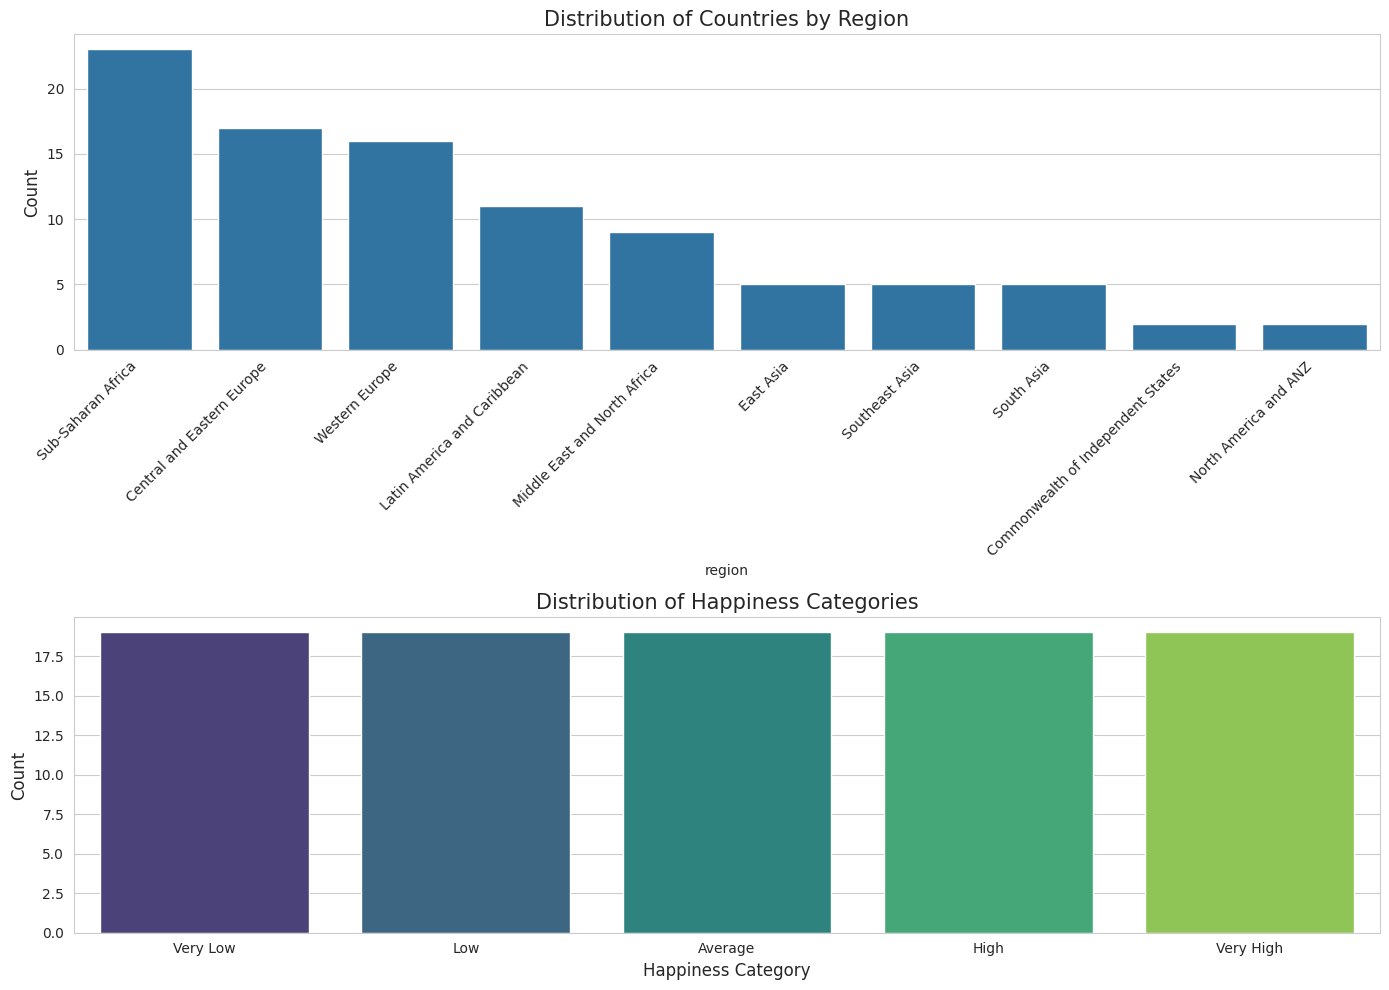

In [ ]:
# Set figure size and style
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# region
plt.subplot(2, 1, 1)
region_counts = X_train['region'].value_counts().sort_values(ascending=False)
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Distribution of Countries by Region', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)

# happiness
plt.subplot(2, 1, 2)
happiness_counts = y_train.value_counts().sort_values(ascending=False)
sns.barplot(x=happiness_counts.index, y=happiness_counts.values, palette='viridis')
plt.title('Distribution of Happiness Categories', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Happiness Category', fontsize=12)
plt.tight_layout()


plt.show()



Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

In [ ]:
import numpy as np
# 1. Calculate correlation matrices

numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Calculate correlation matrices
pearson_corr = X_train[numeric_columns].corr(method='pearson')
spearman_corr = X_train[numeric_columns].corr(method='spearman')

# Print top Pearson correlations
print("Top Pearson Correlations:")
# Get upper triangle of correlations
pearson_upper = pearson_corr.where(np.triu(np.ones(pearson_corr.shape), k=1).astype(bool))
# Stack the correlations and sort
pearson_sorted = pearson_upper.stack().sort_values(ascending=False)
print(pearson_sorted.head(10))  # Top 10 positive correlations
print(pearson_sorted.tail(10))  # Top 10 negative correlations

# Print top Spearman correlations
print("\nTop Spearman Correlations:")
spearman_upper = spearman_corr.where(np.triu(np.ones(spearman_corr.shape), k=1).astype(bool))
spearman_sorted = spearman_upper.stack().sort_values(ascending=False)
print(spearman_sorted.head(10))  # Top 10 positive correlations
print(spearman_sorted.tail(10))  # Top 10 negative correlations



Top Pearson Correlations:
healthy_life_expectancy      life_expectancy                0.959434
hdi                          expected_years_of_schooling    0.939177
                             mean_years_of_schooling        0.934324
                             life_expectancy                0.932439
healthy_life_expectancy      hdi                            0.929456
gdp_per_capita               hdi                            0.902386
expected_years_of_schooling  mean_years_of_schooling        0.880690
gdp_per_capita               healthy_life_expectancy        0.860164
social_support               hdi                            0.855297
life_expectancy              expected_years_of_schooling    0.852332
dtype: float64
perceptions_of_corruption      population_below_poverty_line   -0.181277
freedom_to_make_life_choices   population_below_poverty_line   -0.476459
population_below_poverty_line  gni                             -0.537597
                               mean_years_of_schoo

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

Correlation with Happiness:
                          Feature  Correlation
0                  gdp_per_capita     0.809400
1                  social_support     0.787159
2         healthy_life_expectancy     0.752381
3    freedom_to_make_life_choices     0.581430
5       perceptions_of_corruption     0.470842
4                      generosity    -0.012036
6                      population          NaN
7   population_below_poverty_line          NaN
8                             hdi          NaN
9                 life_expectancy          NaN
10    expected_years_of_schooling          NaN
11        mean_years_of_schooling          NaN
12                            gni          NaN


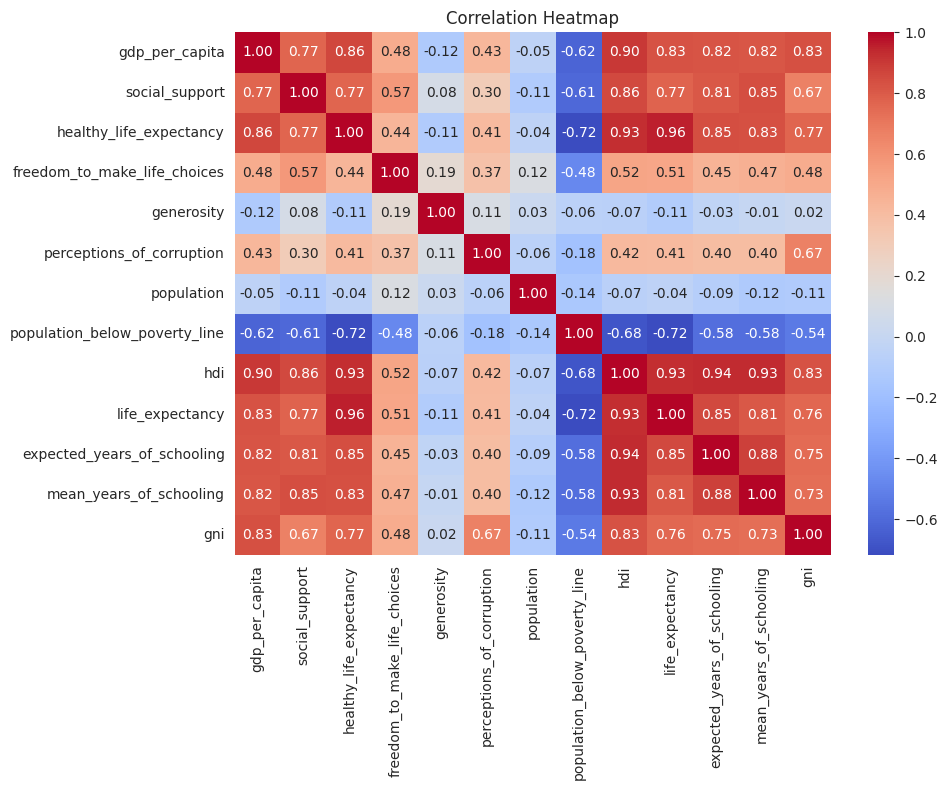

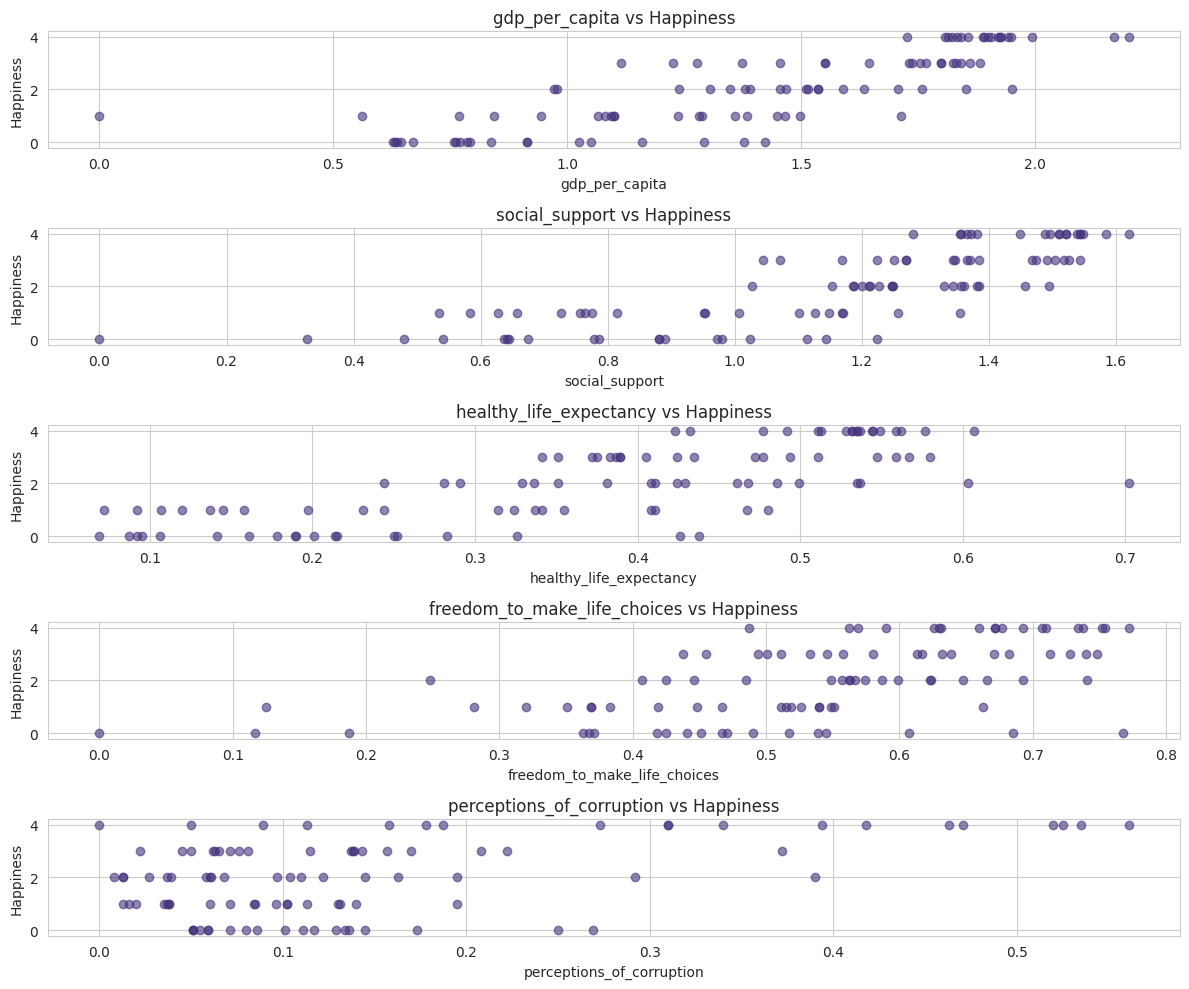

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# correlation table
def correlation_table(X, y, target_name='Happiness'):
    # Get correlations with target
    correlations = {}
    for column in X.select_dtypes(include=[np.number]).columns:
        corr = np.corrcoef(X[column], y)[0, 1]
        correlations[column] = corr

    # Convert to DataFrame and sort
    corr_df = pd.DataFrame({
        'Feature': list(correlations.keys()),
        'Correlation': list(correlations.values())
    })
    corr_df = corr_df.sort_values('Correlation', ascending=False)

    return corr_df

#  correlation heatmap
def plot_heatmap(X):
    # Keep only numeric columns
    numeric_X = X.select_dtypes(include=[np.number])

    # Calculate correlation matrix
    corr = numeric_X.corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

# Bivariate plots with target
def plot_top_relationships(X, y, target_name='Happiness', n_features=5):
    # Get top correlated features
    corr_table = correlation_table(X, y, target_name)
    top_features = corr_table.iloc[:n_features, 0].tolist()

    # Plot each feature against target
    plt.figure(figsize=(12, 10))
    for i, feature in enumerate(top_features):
        plt.subplot(n_features, 1, i+1)
        plt.scatter(X[feature], y, alpha=0.6)
        plt.xlabel(feature)
        plt.ylabel(target_name)
        plt.title(f'{feature} vs {target_name}')

    plt.tight_layout()
    plt.show()


# 1. Show correlation table
corr_table = correlation_table(X_train, y_train_labels, 'Happiness')
print("Correlation with Happiness:")
print(corr_table)

# 2. Plot correlation heatmap
plot_heatmap(X_train)

# 3. Plot top 5 features against target
plot_top_relationships(X_train, y_train_labels, 'Happiness', n_features=5)



Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

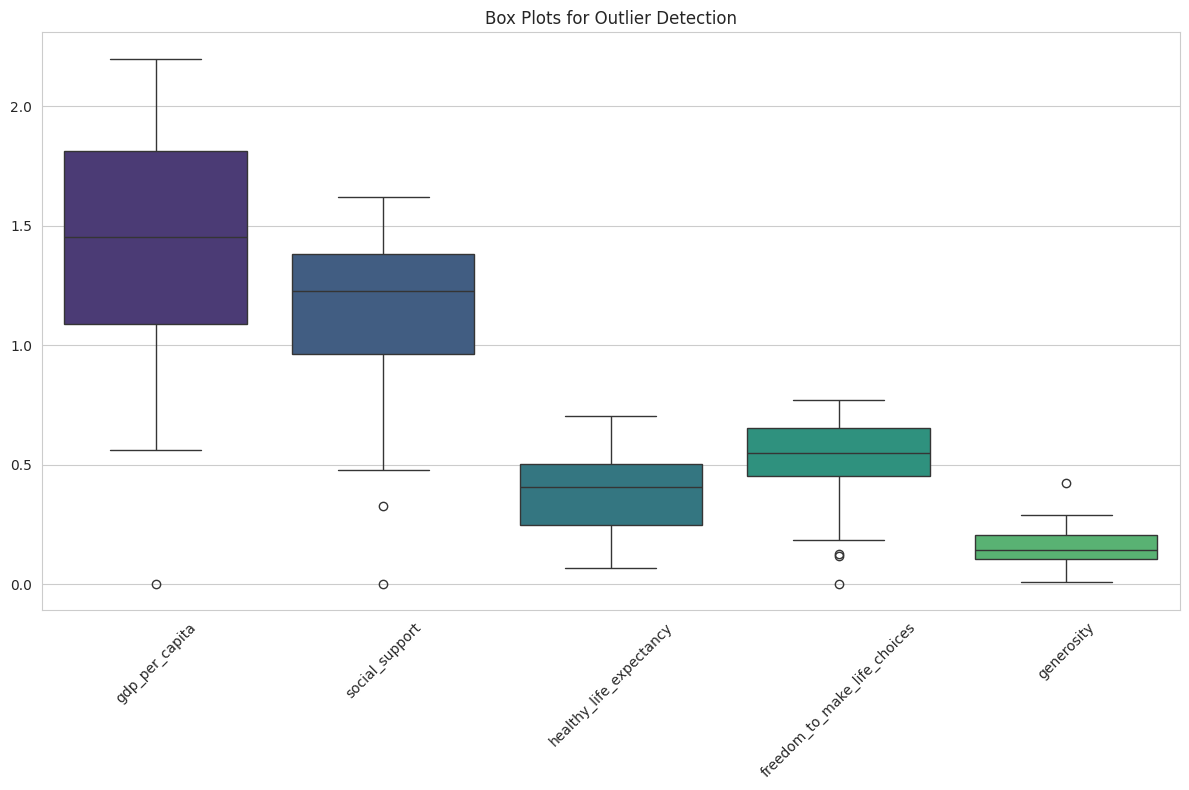

Outliers detected using IQR method (beyond ±1.5*IQR):
gdp_per_capita: 1 outliers (1.1%)
   Outlier values: [0.0]
   Countries: ['Venezuela']
   Normal range: [0.001, 2.898]

social_support: 2 outliers (2.1%)
   Outlier values: [0.0, 0.327]
   Countries: ['Afghanistan', 'Comoros']
   Normal range: [0.332, 2.014]

healthy_life_expectancy: 0 outliers (0.0%)
   Normal range: [-0.140, 0.892]

freedom_to_make_life_choices: 3 outliers (3.2%)
   Outlier values: [0.0, 0.117, 0.125]
   Countries: ['Afghanistan', 'Comoros', 'Turkiye']
   Normal range: [0.152, 0.956]

generosity: 1 outliers (1.1%)
   Outlier values: [0.422]
   Countries: ['Indonesia']
   Normal range: [-0.045, 0.357]



In [ ]:

def detect_outliers_simple(data, columns=None):

    if columns is None:
        columns = data.select_dtypes(include=[np.number]).columns.tolist()[:5]  # Limit to 5 features

    # 1. Box plots - visual detection
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data[columns])
    plt.title('Box Plots for Outlier Detection')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. IQR method - simple statistical approach
    print("Outliers detected using IQR method (beyond ±1.5*IQR):")
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

        print(f"{column}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.1f}%)")

        if len(outliers) > 0 and len(outliers) < 10:
            print(f"   Outlier values: {sorted(outliers[column].tolist())}")
            print(f"   Countries: {sorted(outliers['country'].tolist()) if 'country' in outliers.columns else 'N/A'}")

        print(f"   Normal range: [{lower_bound:.3f}, {upper_bound:.3f}]")
        print()


important_features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                     'freedom_to_make_life_choices', 'generosity']

# Detect outliers
detect_outliers_simple(X_train, columns=important_features)

Write what you observed and your General comments on what should be done:

In [ ]:
### 1. Correlation with Happiness:
#GDP per capita (0.81), social support (0.79), and healthy life expectancy (0.75) have the strongest positive correlations with happiness

### 2. Correlation Heatmap :
#HDI is highly correlated with many variables (especially healthy life expectancy at 0.93), suggesting multicollinearity
#Strong correlations between: GDP per capita and HDI (0.90); Healthy life expectancy and life expectancy (0.96); Expected years of schooling and mean years of schooling (0.88)

### 3. Outliers:
# Venezuela is an outlier for GDP per capita
# Afghanistan and Comoros are outliers for social support and freedom
# Indonesia is an outlier for generosity


## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

Skipping gdp_per_capita: contains zero or negative values


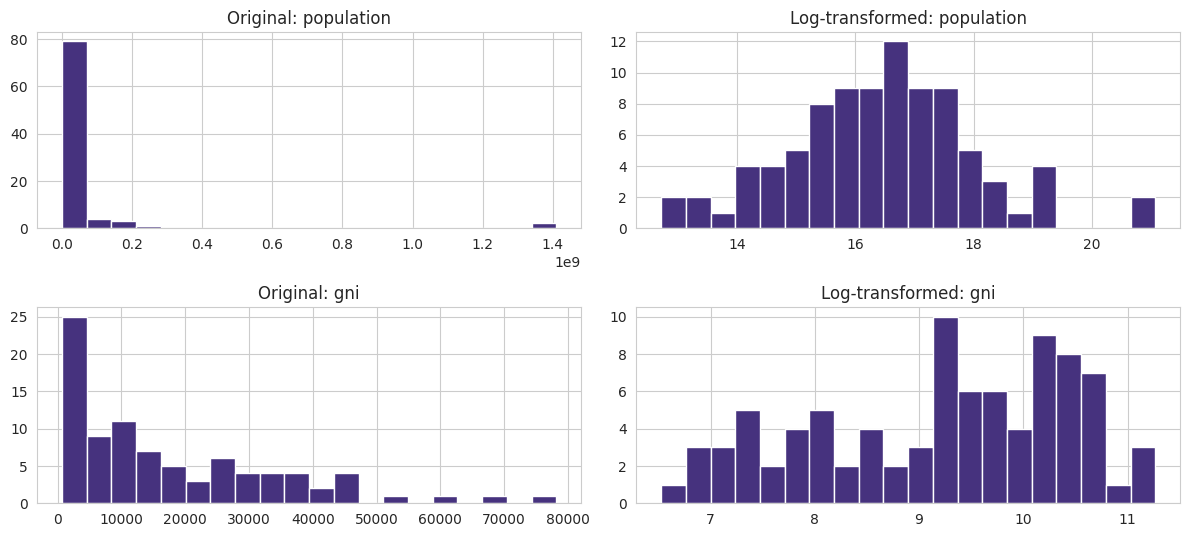

Log transformations created: ['population_log', 'gni_log']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# log transformation for skewed variables
skewed_variables = ['gdp_per_capita', 'population', 'gni']

# Create simple before/after plots
plt.figure(figsize=(12, 8))
for i, var in enumerate(skewed_variables):
    # Check if data has any zeros or negative values
    if (X_train[var] <= 0).any():
        print(f"Skipping {var}: contains zero or negative values")
        continue

    # Create subplots for before/after
    plt.subplot(len(skewed_variables), 2, i*2+1)
    plt.hist(X_train[var], bins=20)
    plt.title(f"Original: {var}")

    # Log transform and plot
    plt.subplot(len(skewed_variables), 2, i*2+2)
    X_train[f'{var}_log'] = np.log(X_train[var])
    plt.hist(X_train[f'{var}_log'], bins=20)
    plt.title(f"Log-transformed: {var}")

plt.tight_layout()
plt.show()

print("Log transformations created:", [f'{var}_log' for var in skewed_variables
                                      if not (X_train[var] <= 0).any()])

Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

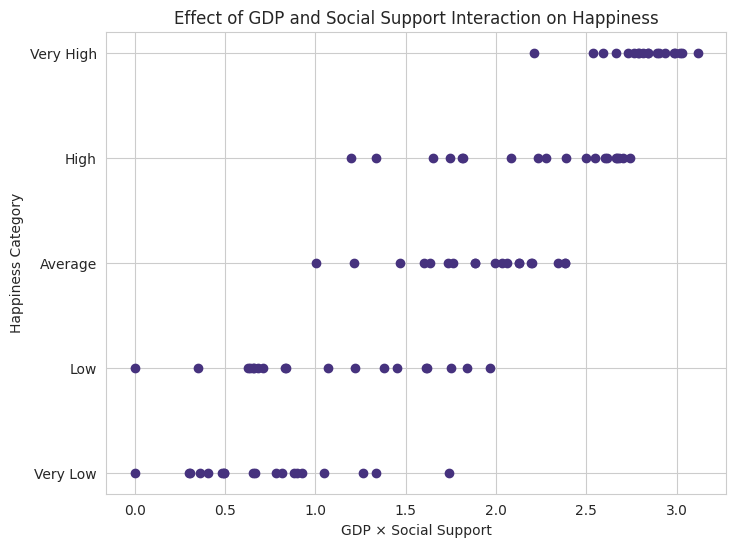

Correlation between GDP × Social Support and Happiness: 0.8691


In [ ]:
# Create one simple interaction term between the two most important features
# From your correlation results, these are gdp_per_capita and social_support

# Create the interaction
X_train['gdp_social_interaction'] = X_train['gdp_per_capita'] * X_train['social_support']

# Quick plot to see relationship with happiness
plt.figure(figsize=(8, 6))
# Use y_train instead of X_train['happiness_score'] since happiness_score is not in X_train
plt.scatter(X_train['gdp_social_interaction'], y_train)
plt.xlabel('GDP × Social Support')
plt.ylabel('Happiness Category')
plt.title('Effect of GDP and Social Support Interaction on Happiness')
plt.show()

# Check correlation with target
# Convert categorical y_train to numeric if needed
y_numeric = y_train.astype('category').cat.codes if isinstance(y_train.iloc[0], str) else y_train
correlation = np.corrcoef(X_train['gdp_social_interaction'], y_numeric)[0, 1]
print(f"Correlation between GDP × Social Support and Happiness: {correlation:.4f}")

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['number'])  # Drop all the non-numerical features from X_train
numeric_features = numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['country', 'region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
     ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [ ]:
print(X_train.columns.tolist())

['country', 'region', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'country_name', 'population', 'population_below_poverty_line', 'hdi', 'life_expectancy', 'expected_years_of_schooling', 'mean_years_of_schooling', 'gni', 'population_log', 'gni_log', 'gdp_social_interaction']


Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer : we separate numeric and categorical features to apply different transformations to each type.

## Numeric Data Processing:
# Imputation: We replace missing values with 0 using SimpleImputer(strategy='constant', fill_value=0).
# Scaling: We standardize features using StandardScaler(), which transforms each feature to have mean=0 and standard deviation=1.
# This scaling is crucial because features like GDP and population have vastly different scales, which could cause some variables to dominate in distance-based algorithms or gradient-based optimization.

##Categorical Data Processing:
# Imputation: We replace missing values with the most frequent value using SimpleImputer(strategy='most_frequent').
# Encoding: We convert categorical variables into numeric form using OneHotEncoder(handle_unknown='ignore').
# The handle_unknown='ignore' parameter ensures our pipeline doesn't break if new categories appear in the test set.

##Pipeline Construction:
#We organize these operations into separate pipelines for each data type. -> This ensures transformations are applied in the correct order.

##Combining Transformers:
#ColumnTransformer applies each pipeline to the appropriate columns. -> This creates a unified preprocessing workflow that handles mixed data types.

##Fit and Transform:
#We fit the preprocessor on training data, learning parameters like means and standard deviations.
#We then transform both training and test data consistently.

In [1]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
## Your Answer :

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

## 4. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = ## Define a Random Forest Model here, fit it, and score it

# Your cell should have a score between 0-1 as output

## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = ## Make a new model with changed parameters to improve the score

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer :

In [ ]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = # Predict

## Write code to show model performance by comparing prediction_labels with true labels


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer:

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = # Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

gridmodel = # Read GridSearchCV docs and create an object with RandomForestClassifier as the model

#use model methods to fit score and predict model:


#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


In [ ]:
#Submit Model 3:

#-- Generate predicted values


## Write code to show model performance by comparing prediction_labels with true labels


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = ## Read documentations of imported models and fit them.

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:

## 7. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=#count features in input data

keras_model = ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)


#Use Softmax activation in last layer. How many neurons should there be in the last layer?



# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:

Can you try getting the model's training history out and plotting the curves?

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

In [ ]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index= # Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels


Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
# Your code here:

In [ ]:
# Your comments about the change in performance

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [ ]:
# Your code here:

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
# Define an explainer that will help us interpret the model's decisions
# (Hint: Use shap.Explainer with the trained model and X_test data)

explainer = ## Initialize SHAP explainer using the trained model

# Compute SHAP values for X_test
# This step generates Shapley values, which explain how each feature contributes to predictions
shap_values = ## Apply the explainer to X_test

# Generate SHAP summary plot
# This plot will show which features have the most impact on predictions
shap.summary_plot(## Pass the required parameters to create a summary plot)

# Your cell should output a SHAP summary plot showing the most important features.


<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
## Your Code and Answer:

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked